# Outliers

**Topics**

1. Outliers
2. What is percentile
3. Remove outliers from simple dataset
4. Remove outliers from complex dataset
5. Exercise

# Theory

Outliers are unusual datapoints which are very different from the rest of the observation for example analyzing the dataset which has people's age in it now we might see up to ninety or hundreds years of age but if we see a data point that has thousand years than thats an outlier that clearly indicates an error in data collection sometimes outliers can happen just because there is a nature of variation in your dataset for example we see a datapoint with 120 years age that could not be an error maybe its a legitimate valid data point but since it is very different from the rest of the data points, so it can skewed the statistical power of the data analysis process, for that reason often if not all the time it makes sense that we detect outliers and remove that, now there are many different ways of detecting and removing outliers and there are statistical techniques such as percentile, z-score, standard deviation, and we can also use visualization or box plot a scatter plot to detect the outliers, in this section we will dive into percentile way of removing and detecting outliers.

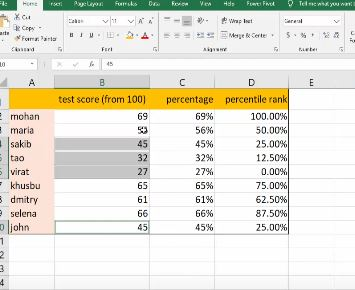

Lets first understand what exactly is percentile, we might have notice that in some of the test-score techniques they use relative score, here in this excel image, we have the test-score of different people out of hundred, now if we use our visual percentage score then the 2nd column will be our percentage score but sometimes people use relative scoring technique where 69 is the highest test score hence they will say this person achieved 100% and 27 is the lowest score hence we will say this person achieved zero so basically 27 is at the botton and 69 is at the top, now the definition of percentile and the last columns as shown is the percentile rank, so here it is 50% on the second row which means that 50% of the samples are below value 56 so lets count it so there are 4 samples as selected (45,32,27,45) so 4 out of 8 are below 56 as 56 is excluded due to comparison which means this is 50%tile and the top 69 is 100%tile because all the datapoints are below 69.

# Coding

# simple dataset

In [1]:
import pandas as pd

df = pd.read_csv('02_heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [2]:
# percentile feature

In [5]:
max_threshold = df.height.quantile(0.95)
max_threshold

np.float64(9.689999999999998)

In [6]:
# what this means is 9.68 is 95% quantile anything above this can be consider as an outlier

In [8]:
# identifying outliers

df[df.height>max_threshold]

,name,height
9,imran,14.5


In [9]:
min_threshold = df.height.quantile(0.05)
min_threshold

np.float64(3.6050000000000004)

In [10]:
df[df.height<min_threshold]

,name,height
12,yoseph,1.2


In [13]:
# removing outliers

df[ (df['height'] < max_threshold ) & (df['height'] > min_threshold) ]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


# Complex Dataset

In [14]:
df = pd.read_csv('02_bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
df.shape

(13200, 7)

In [16]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [17]:
# 25 50 75 these are percentiles

In [18]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])

min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [20]:
df[df.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [21]:
df[df.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [22]:
df2 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df2.shape

(13172, 7)

In [27]:
df2.sample(20) # using sample will select 20 random rows from the entire document

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5016,Dasarahalli,3 BHK,2100.0,3.0,120.00,3,5714
1765,7th Phase JP Nagar,2 BHK,1180.0,2.0,72.00,2,6101
1753,Jigani,2 BHK,914.0,2.0,47.00,2,5142
3138,Jakkur,4 BHK,3181.0,4.0,260.50,4,8189
6064,Kengeri,1 BHK,540.0,1.0,22.50,1,4166
7999,7th Phase JP Nagar,2 BHK,1120.0,2.0,65.00,2,5803
3049,other,2 BHK,1205.0,2.0,42.18,2,3500
10158,Banashankari,3 BHK,1800.0,3.0,175.00,3,9722
5945,Hosa Road,2 Bedroom,880.0,2.0,50.00,2,5681
12257,Uttarahalli,2 BHK,1165.0,1.0,42.09,2,3612


In [28]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [29]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07
